In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
original_image = cv2.imread("/home/sd/Downloads/port_campbell.jpg") #https://commons.wikimedia.org/wiki/File:Port_Campbell_(AU),_Port_Campbell_National_Park_--_2019_--_0901.jpg

In [3]:
original_image

array([[[223, 205, 198],
        [223, 205, 198],
        [224, 206, 199],
        ...,
        [214, 212, 211],
        [214, 212, 211],
        [213, 211, 210]],

       [[222, 204, 197],
        [223, 205, 198],
        [223, 205, 198],
        ...,
        [213, 211, 210],
        [212, 210, 209],
        [212, 210, 209]],

       [[222, 204, 197],
        [223, 205, 198],
        [223, 205, 198],
        ...,
        [210, 208, 207],
        [211, 209, 208],
        [211, 209, 208]],

       ...,

       [[ 92, 148, 195],
        [ 94, 150, 197],
        [ 88, 146, 195],
        ...,
        [ 39,  72,  91],
        [ 68, 102, 118],
        [ 50,  85,  99]],

       [[ 77, 133, 180],
        [ 73, 129, 176],
        [ 69, 127, 176],
        ...,
        [ 31,  64,  84],
        [ 33,  67,  83],
        [ 31,  66,  80]],

       [[ 74, 130, 177],
        [ 81, 137, 184],
        [ 69, 127, 176],
        ...,
        [ 40,  74,  97],
        [ 20,  56,  74],
        [ 40,  76,  92]]

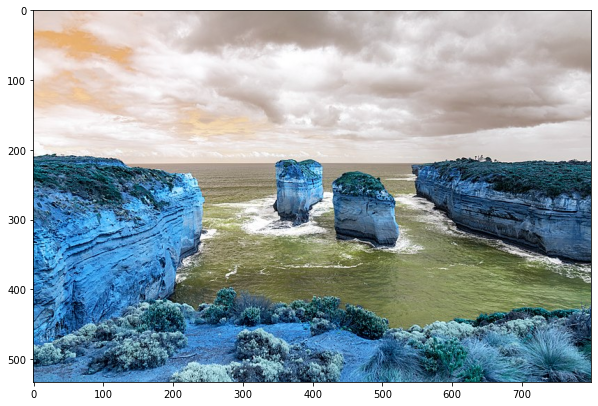

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(original_image)

In [5]:
#converting the image so that K-Means can process
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1,3))
pixel_values = np.float32(pixel_values)

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 5
#cv2 provides its own implementation of K-Means
_, labels, (centers) = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

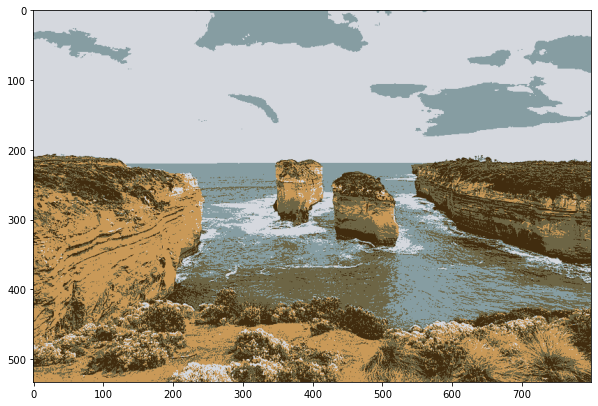

In [7]:
#plotting the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.figure(figsize=(10,10))
plt.imshow(segmented_image)
plt.show()

In [ ]:
# The above image shows the five clusters each image has been assigned to in terms of its colors.